# Лабораторна робота №2: Очистка даних та базова візуалізація

Київський національний університет імені Тараса Шевченка провів відкритий екзамен з Нейронних мереж серед студентів та викладачів університету. Оскільки результати екзамену фіксувалися різними викладачами та відповідальними особами, дані записані у різних форматах, що ускладнює їх аналіз.

Ректорат університету просить привести дані до єдиного формату та виконати їх аналіз для визначення рівня підготовки студентів різних факультетів. Це допоможе ухвалити рішення щодо необхідності впровадження покращених або базових курсів з Нейронних мереж для окремих факультетів.


## Завдання 1. Очистка датасету

**Обробити вхідний датасет, забезпечивши, щоб усі записи з кожного стовпчика відповідали єдиному формату:**

1. **Ім'я:**
    * поле "name" містить лише ім'я
    * поле "surname" містить лише прізвище
    * додайте стовпчик "patronymic" який містить по-батькові
    * зверніть увагу, що у вхідному датасеті поле "name" може містити ім'я записане у різних форматах:
        * Ім'я
        * Ім'я Прізвище
        * Ім'я По-батькові Прізвище
    * Розбийте ім'я, прізвище та по-батькові за відповідними колонками
2. **Стовпчик назв факультетів містить лише 4 різних значення які відповідають наступним факультетам:**
    * Факультет комп'ютрених наук та кібернетики
    * Факультет радіофізики електроніки та комп'ютерних систем
    * Механіко-математичний факультет
    * Факультет інформаційних технологій
3. **Номери телефонів повинні відповідати формату +38(YYY) XXX-XX-XX, де YYY - код оператора**
4. **Стовчик "education level", який містить назву ОКР повинен мати одне з чотирьох значень:**
    * бакалавр
    * магістр
    * аспірант
    * (пусте поле) для викладачів
5. **Розбити стовпчик "score" на два стовпчика: "100_score" та "5_score", прибравши оригінальний стовпчик "score"**
    * Оцінка 3 конвертується у 60, 4 конвертується у 75, а 5 конвертується у 90
    * Оцінки [60; 74] конвертуються у 3, [75; 89] конвертуються у 4, а [90; 100] у 5
6. **Стовпчик повинен мати лише одне з двох значень яке визначатиме чи запис відноситься до студента чи до викладача**

_Якщо у процесі очистки датасету з'явились дубльовані рядки, необхідно їх прибрати._

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("exam_dataset.csv")
print(df.shape)
df.head()

(131, 9)


,id,name,surname,faculty,phone number,course,education level,score,role
0,2,Олена Дмитрівна,Гнатюк,Факультет комп'ютрених наук та кібернетики,0772570497,1.0,аспірант,95,Студентка
1,6,Михайло Васильович,Гончаренко,Факультет радіофізики електроніки та комп'ютер...,093 333 1022,1.0,аспірант,4,Студент
2,7,Наталія,Сидоренко,ФРЕКС,093 302 8386,1.0,магістр,85,Студентка
3,12,Дмитро Чумак,NaN,Факультет радіофізики електроніки та комп'ютер...,+38(096) 676-02-62,1.0,аспірантура,75,Студент
4,13,Володимир Григорійович,Ткаченко,ФКНК,0984209177,1.0,магістр,78,Студент


In [4]:
# ------------------------------------------------------------------------------------------------
# 1. Розбиття колонки name на name, surname, patronymic
# ------------------------------------------------------------------------------------------------


def split_name(full_name):
    parts = full_name.strip().split(" ")

    if len(parts) == 1:
        # лише Ім'я
        return parts[0], "", ""
    elif len(parts) == 2:
        # Ім'я Прізвище
        return parts[0], "", parts[1]
    elif len(parts) == 3:
        # Ім'я По-батькові Прізвище
        return parts[0], parts[1], parts[2]
    else:
        raise ValueError("Некоректне ім'я: {}".format(full_name))

df["surname"].fillna("", inplace=True) # позбудемося від NaN
df["name"] = df["name"] + " " + df["surname"]
df[["name", "patronymic", "surname"]] = df["name"].apply(lambda x: pd.Series(split_name(str(x))))
df.head()


/tmp/ipykernel_138433/1465409578.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["surname"].fillna("", inplace=True) # позбудемося від NaN


,id,name,surname,faculty,phone number,course,education level,score,role,patronymic
0,2,Олена,Гнатюк,Факультет комп'ютрених наук та кібернетики,0772570497,1.0,аспірант,95,Студентка,Дмитрівна
1,6,Михайло,Гончаренко,Факультет радіофізики електроніки та комп'ютер...,093 333 1022,1.0,аспірант,4,Студент,Васильович
2,7,Наталія,Сидоренко,ФРЕКС,093 302 8386,1.0,магістр,85,Студентка,
3,12,Дмитро,Чумак,Факультет радіофізики електроніки та комп'ютер...,+38(096) 676-02-62,1.0,аспірантура,75,Студент,
4,13,Володимир,Ткаченко,ФКНК,0984209177,1.0,магістр,78,Студент,Григорійович


In [5]:
# ------------------------------------------------------------------------------------------------
# 2. Уніфікація назв факультетів (faculty)
# ------------------------------------------------------------------------------------------------


def normalize_faculty(faculty_raw):
    f = str(faculty_raw).lower().strip()
    
    if "кібернетики" in f or "фкнк" in f:
        return "Факультет комп'ютрених наук та кібернетики"
    elif "радіофізики" in f or "фрекс" in f:
        return "Факультет радіофізики електроніки та комп'ютерних систем"
    elif "математичний" in f or "мех-мат" in f:
        return "Механіко-математичний факультет"
    elif "інформаційних" in f or "фіт" in f:
        return "Факультет інформаційних технологій"
    else:
        raise ValueError("Невідомий факультет: {}".format(faculty_raw))

df["faculty"] = df["faculty"].apply(normalize_faculty)
df.head()

,id,name,surname,faculty,phone number,course,education level,score,role,patronymic
0,2,Олена,Гнатюк,Факультет комп'ютрених наук та кібернетики,0772570497,1.0,аспірант,95,Студентка,Дмитрівна
1,6,Михайло,Гончаренко,Факультет радіофізики електроніки та комп'ютер...,093 333 1022,1.0,аспірант,4,Студент,Васильович
2,7,Наталія,Сидоренко,Факультет радіофізики електроніки та комп'ютер...,093 302 8386,1.0,магістр,85,Студентка,
3,12,Дмитро,Чумак,Факультет радіофізики електроніки та комп'ютер...,+38(096) 676-02-62,1.0,аспірантура,75,Студент,
4,13,Володимир,Ткаченко,Факультет комп'ютрених наук та кібернетики,0984209177,1.0,магістр,78,Студент,Григорійович


In [6]:
# ------------------------------------------------------------------------------------------------
# 3. Приведення телефонів до формату +38(YYY) XXX-XX-XX
# ------------------------------------------------------------------------------------------------

# для цьог о використаємо регулярні вирази
import re

def normalize_phone(phone_raw):
    digits = re.sub(r"[^\d]", "", str(phone_raw))  # лишаємо лише цифри
    # Перевіримо довжину; якщо вхід містить 9 чи 10 цифр, то вважатимемо це valid
    
    # бракує першої '0' в номері
    if len(digits) == 9:
        digits = "0" + digits

    # у форматі 0YYXXXXXXX
    if len(digits) == 10:
        digits = "38" + digits  # робимо 12 цифр
    
    # Тепер має бути 12 цифр: 38 0YY XXXXXX
    if len(digits) == 12 and digits.startswith("38"):
        return f"+{digits[0:2]}({digits[2:5]}) {digits[5:8]}-{digits[8:10]}-{digits[10:12]}"
    else:
        # Якщо формат все ще не підходить, повернемо як є або None
        return phone_raw
    
df["phone number"] = df["phone number"].apply(normalize_phone)
print(df.shape) 
df.head()

(131, 10)


,id,name,surname,faculty,phone number,course,education level,score,role,patronymic
0,2,Олена,Гнатюк,Факультет комп'ютрених наук та кібернетики,+38(077) 257-04-97,1.0,аспірант,95,Студентка,Дмитрівна
1,6,Михайло,Гончаренко,Факультет радіофізики електроніки та комп'ютер...,+38(093) 333-10-22,1.0,аспірант,4,Студент,Васильович
2,7,Наталія,Сидоренко,Факультет радіофізики електроніки та комп'ютер...,+38(093) 302-83-86,1.0,магістр,85,Студентка,
3,12,Дмитро,Чумак,Факультет радіофізики електроніки та комп'ютер...,+38(096) 676-02-62,1.0,аспірантура,75,Студент,
4,13,Володимир,Ткаченко,Факультет комп'ютрених наук та кібернетики,+38(098) 420-91-77,1.0,магістр,78,Студент,Григорійович


In [7]:
# ------------------------------------------------------------------------------------------------
# 4. Уніфікація освітнього рівня (education level)
# ------------------------------------------------------------------------------------------------

def normalize_education_level(level):
    l = str(level).lower().strip()
    if "бак" in l:
        return "бакалавр"
    elif "маг" in l:
        return "магістр"
    elif "асп" in l:
        return "аспірант"
    else:
        # все інше - викладач
        return ""
    
df["education level"] = df["education level"].apply(normalize_education_level)
print(df.shape)
df.head()

(131, 10)


,id,name,surname,faculty,phone number,course,education level,score,role,patronymic
0,2,Олена,Гнатюк,Факультет комп'ютрених наук та кібернетики,+38(077) 257-04-97,1.0,аспірант,95,Студентка,Дмитрівна
1,6,Михайло,Гончаренко,Факультет радіофізики електроніки та комп'ютер...,+38(093) 333-10-22,1.0,аспірант,4,Студент,Васильович
2,7,Наталія,Сидоренко,Факультет радіофізики електроніки та комп'ютер...,+38(093) 302-83-86,1.0,магістр,85,Студентка,
3,12,Дмитро,Чумак,Факультет радіофізики електроніки та комп'ютер...,+38(096) 676-02-62,1.0,аспірант,75,Студент,
4,13,Володимир,Ткаченко,Факультет комп'ютрених наук та кібернетики,+38(098) 420-91-77,1.0,магістр,78,Студент,Григорійович


In [8]:
# ------------------------------------------------------------------------------------------------
# 5. Розбиття стовпчика "score" на "100_score" і "5_score", прибирання оригінального
#    - Оцінка 3 => 60, 4 => 75, 5 => 90
#    - В проміжку [60..74] => 3, [75..89] => 4, [90..100] => 5
# ------------------------------------------------------------------------------------------------

def split_score(score):
    """Якщо в score знаходиться 3,4 або 5, то переводимо у 100-бальну.
       Якщо ж там 60..100, то переводимо у 5-бальну.
       Якщо трапиться щось інше - обробляємо додатково."""
    try:
        val = float(score)
    except:
        return np.nan, np.nan
    
    # Якщо оцінимо, що значення <= 5, ймовірно 5-бальна шкала:
    if val in [3, 4, 5]:
        # Переведемо у 100-бальну:
        if val == 3:
            return 60, 3
        elif val == 4:
            return 75, 4
        else:  # val == 5
            return 90, 5
    else:
        # Припустимо, що це вже 60..100
        # Конвертація у 5-бальну
        if 60 <= val <= 74:
            return val, 3
        elif 75 <= val <= 89:
            return val, 4
        elif 90 <= val <= 100:
            return val, 5
        else:
            # Якщо опинились тут, то значення не підпадає під умови
            return np.nan, np.nan
        
df[["100_score", "5_score"]] = df["score"].apply(lambda s: pd.Series(split_score(s)))
df.drop(columns=["score"], inplace=True, errors="ignore")
print(df.shape)
df.head()

(131, 11)


,id,name,surname,faculty,phone number,course,education level,role,patronymic,100_score,5_score
0,2,Олена,Гнатюк,Факультет комп'ютрених наук та кібернетики,+38(077) 257-04-97,1.0,аспірант,Студентка,Дмитрівна,95.0,5.0
1,6,Михайло,Гончаренко,Факультет радіофізики електроніки та комп'ютер...,+38(093) 333-10-22,1.0,аспірант,Студент,Васильович,75.0,4.0
2,7,Наталія,Сидоренко,Факультет радіофізики електроніки та комп'ютер...,+38(093) 302-83-86,1.0,магістр,Студентка,,85.0,4.0
3,12,Дмитро,Чумак,Факультет радіофізики електроніки та комп'ютер...,+38(096) 676-02-62,1.0,аспірант,Студент,,75.0,4.0
4,13,Володимир,Ткаченко,Факультет комп'ютрених наук та кібернетики,+38(098) 420-91-77,1.0,магістр,Студент,Григорійович,78.0,4.0


In [9]:
# ------------------------------------------------------------------------------------------------
# 6. Колонка role має мати 2 можливі значення: "студент" або "викладач"
# ------------------------------------------------------------------------------------------------

def normalize_role(role):
    r = str(role).lower().strip()
    if "студ" in r:
        return "студент"
    else:
        return "викладач"
    
df["role"] = df["role"].apply(normalize_role)
df.head()

,id,name,surname,faculty,phone number,course,education level,role,patronymic,100_score,5_score
0,2,Олена,Гнатюк,Факультет комп'ютрених наук та кібернетики,+38(077) 257-04-97,1.0,аспірант,студент,Дмитрівна,95.0,5.0
1,6,Михайло,Гончаренко,Факультет радіофізики електроніки та комп'ютер...,+38(093) 333-10-22,1.0,аспірант,студент,Васильович,75.0,4.0
2,7,Наталія,Сидоренко,Факультет радіофізики електроніки та комп'ютер...,+38(093) 302-83-86,1.0,магістр,студент,,85.0,4.0
3,12,Дмитро,Чумак,Факультет радіофізики електроніки та комп'ютер...,+38(096) 676-02-62,1.0,аспірант,студент,,75.0,4.0
4,13,Володимир,Ткаченко,Факультет комп'ютрених наук та кібернетики,+38(098) 420-91-77,1.0,магістр,студент,Григорійович,78.0,4.0


In [10]:
# ------------------------------------------------------------------------------------------------
# Видалимо можливі дублікати
# ------------------------------------------------------------------------------------------------

df.drop_duplicates(inplace=True)
print(df.shape)

(131, 11)


## Завдання 2. Візуалізація основних метрик

### Візуалізація 2.1

_**Діаграма "Пиріг" яка відображає кількість студентів з кожного ОКР (бакалавр, магістр, аспірант).**_

(124, 11)


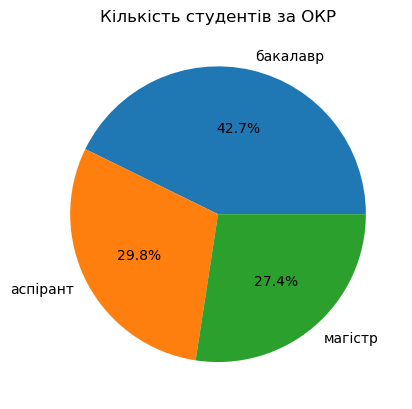

In [11]:
# Фільтруємо лише студентів:
df_students = df[df["role"] == "студент"]
print(df_students.shape)

okr_counts = df_students["education level"].value_counts()

plt.figure()
okr_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Кількість студентів за ОКР")
plt.ylabel("") 
plt.show()

### Візуалізація 2.2

_**Гістограма розподілу оцінок за 100-бальною шкалою (у проміжку від 60 до 100).**_

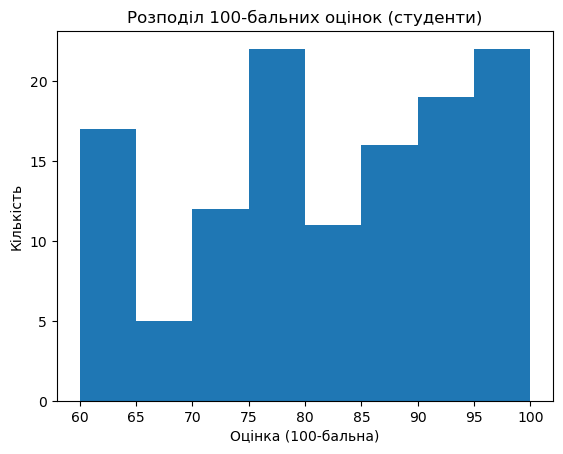

In [12]:
scores_100 = df_students["100_score"].dropna()
scores_100 = scores_100[(scores_100 >= 60) & (scores_100 <= 100)]

plt.figure()
plt.hist(scores_100, bins=range(60, 101, 5))  # діапазон 60..100, крок 5
plt.title("Розподіл 100-бальних оцінок (студенти)")
plt.xlabel("Оцінка (100-бальна)")
plt.ylabel("Кількість")
plt.show()

### Візуалізація 2.3

_**Діаграма "Пиріг" розподілу оцінок за 5-ти бальною шкалою.**_

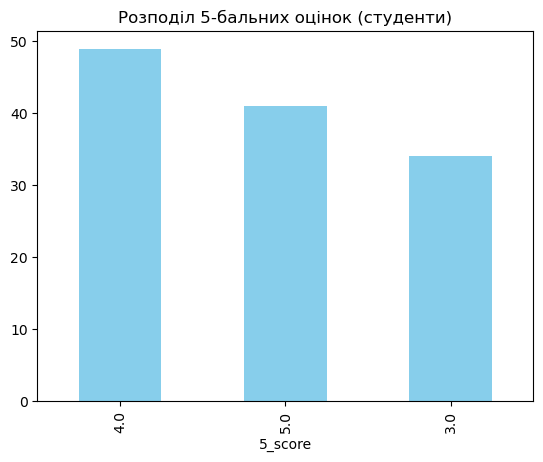

In [24]:
scores_5_counts = df_students["5_score"].value_counts()

plt.figure()
scores_5_counts.plot(kind='bar', color='skyblue')
plt.title("Розподіл 5-бальних оцінок (студенти)")
plt.ylabel("")
plt.show()

### Візуалізація 2.4

_**Гістограма середніх значень оцінок за кожним з чотирьох факультетів (тільки для студентів).**_

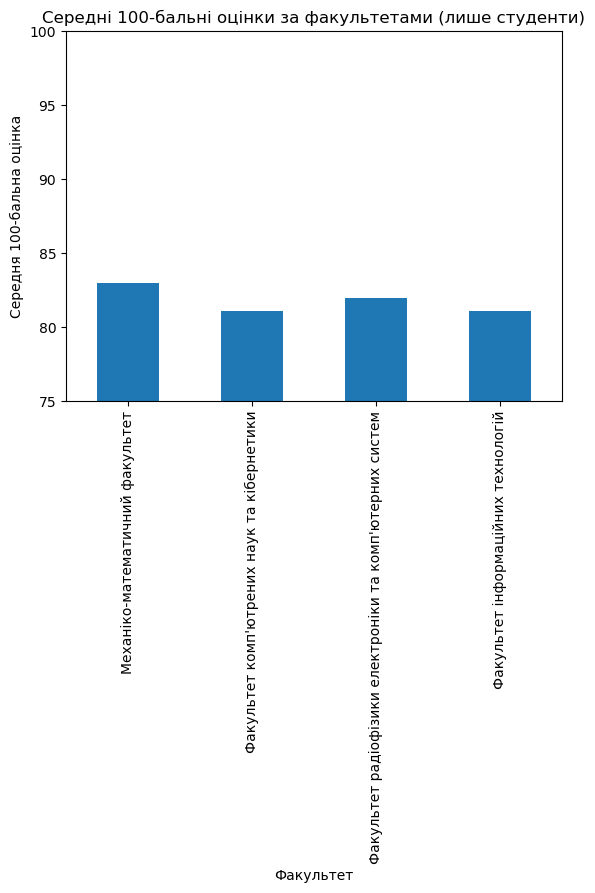

In [19]:
faculty_means = df_students.groupby("faculty")["100_score"].mean().dropna()

plt.figure()
faculty_means.plot(kind='bar')
plt.title("Середні 100-бальні оцінки за факультетами (лише студенти)")
plt.xlabel("Факультет")
plt.ylabel("Середня 100-бальна оцінка")
plt.ylim(75, 100)
plt.show()

### Візуалізація 2.5

_**Діаграма "Ящик з вусами" для оцінок за кожним ОКР та для Викладачів.**_

education_for_box
бакалавр    53
аспірант    37
магістр     34
викладач     7
Name: count, dtype: int64


<Figure size 640x480 with 0 Axes>

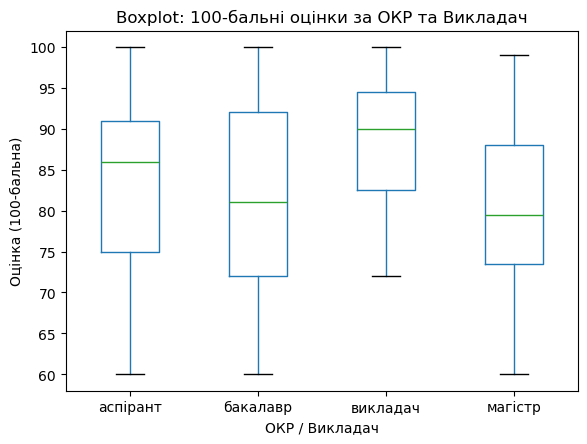

In [15]:
df_box = df.copy()
df_box["education_for_box"] = df_box.apply(
    lambda row: row["education level"] if row["role"] == "студент" else "викладач",
    axis=1
)

print(df_box["education_for_box"].value_counts())

plt.figure()
df_box.boxplot(column="100_score", by="education_for_box", grid=False)
plt.title("Boxplot: 100-бальні оцінки за ОКР та Викладач")
plt.suptitle("") 
plt.xlabel("ОКР / Викладач")
plt.ylabel("Оцінка (100-бальна)")
plt.show()

### Візуалізація 2.6 (*)

_**Графік вісь абсцис котрого є наведені значення у порядку:**_

* _**1 курс бакалавр**_
* _**2 курс бакалавр**_
* _**3 курс бакалавр**_
* _**4 курс бакалавр**_
* _**1 курс магістр**_
* _**2 курс магістр**_
* _**1 курс аспірант**_
* _**2 курс аспірант**_
* _**3 курс аспірант**_
* _**4 курс аспірант**_
* _**Викладачі**_

_**Вісь ординат - середня оцінка для кожної з категорій.**_

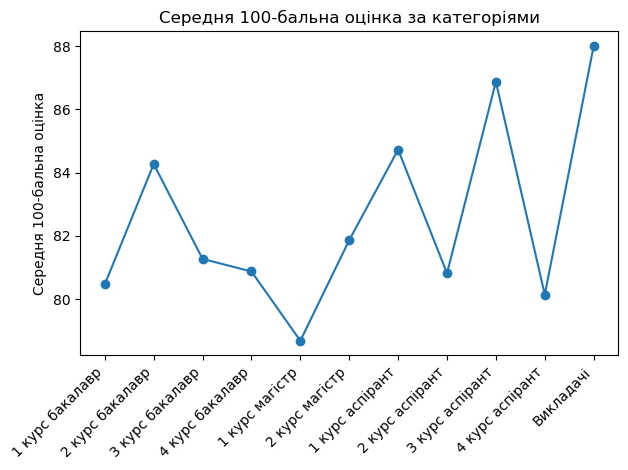

In [16]:
category_order = [
    ("бакалавр", 1),
    ("бакалавр", 2),
    ("бакалавр", 3),
    ("бакалавр", 4),
    ("магістр", 1),
    ("магістр", 2),
    ("аспірант", 1),
    ("аспірант", 2),
    ("аспірант", 3),
    ("аспірант", 4),
    ("викладач", 0)   # умовно позначимо 0 для викладачів
]

# Створимо в датафреймі колонку для ідентифікації цих груп
def get_category(row):
    if row["role"] == "викладач":
        return ("викладач", 0)
    else:
        # маємо ("бакалавр"/"магістр"/"аспірант") і деякий row["course"]
        return (row["education level"], row["course"]) if not pd.isna(row["course"]) else (row["education level"], 0)

df["plot_category"] = df.apply(get_category, axis=1)

# Обчислимо середню оцінку для кожної категорії
avg_scores_by_cat = df.groupby("plot_category")["100_score"].mean()

# Побудуємо список середніх значень у потрібному порядку
ordered_means = []
labels = []
for cat in category_order:
    if cat in avg_scores_by_cat.index:
        ordered_means.append(avg_scores_by_cat[cat])
    else:
        ordered_means.append(np.nan)
    labels.append(f"{cat[1]} курс {cat[0]}" if cat[0] != "викладач" else "Викладачі")

x = range(len(category_order))

plt.figure()
plt.plot(x, ordered_means, marker='o')  # лінійний графік
plt.xticks(x, labels, rotation=45, ha='right')
plt.title("Середня 100-бальна оцінка за категоріями")
plt.ylabel("Середня 100-бальна оцінка")
plt.tight_layout()
plt.show()

### Візуалізація 2.7 (*)

_**Діаграма "Пиріг" яка відображає кількість номерів телефонів за кожним з операторів ([Kyivstar, Lifecell, Vodafone](https://uk.wikipedia.org/wiki/Коди_мобільних_операторів_України)).**_

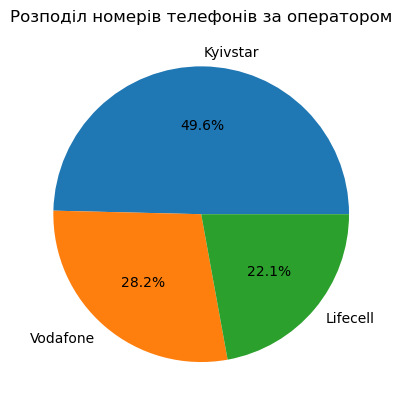

In [22]:
def get_operator(phone):
    # Очікуємо формат: +38(YYY) XXX-XX-XX
    match = re.match(r"^\+38\((\d{3})\)", str(phone))
    if not match:
        return "Невідомо"
    code = match.group(1)
    
    if code in ["067", "068", "096", "097", "098", "077", "039"]:
        return "Kyivstar"
    elif code in ["050", "066", "095", "099", "075"]:
        return "Vodafone"
    elif code in ["063", "073", "093"]:
        return "Lifecell"
    else:
        return "Інший/Невідомо"

df["operator"] = df["phone number"].apply(get_operator)

operator_counts = df["operator"].value_counts()

plt.figure()
operator_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title("Розподіл номерів телефонів за оператором")
plt.ylabel("")
plt.show()